In [ ]:
import torch

from haloflow.npe import valid as V
from haloflow.npe import plotting

cuda = torch.cuda.is_available()
device = ("cuda:0" if cuda else "cpu")

In [2]:
sims = ['Simba100', 'Eagle100', 'TNG50', 'TNG100', 'TNG_ALL'] 
obs = 'mags'

In [3]:
train_sim = sims[0]
test_sim = sims[1]
ranks, alpha, ecp = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim=test_sim, version=1)

1005 models trained
[594, 316, 732, 978, 915]


/groups/chhahn/haloflow/src/haloflow/util.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  qphi = torch.load(fqphi, map_location=device)
/groups/chhahn/haloflow/src/halo

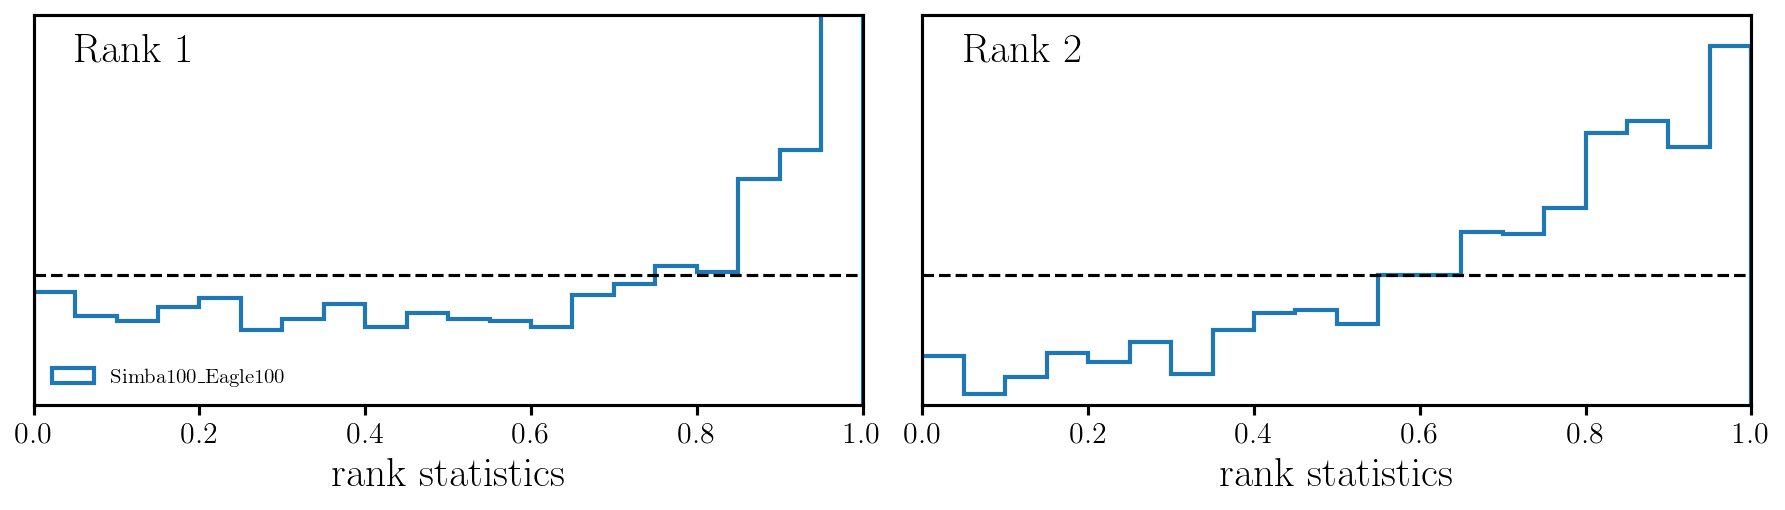

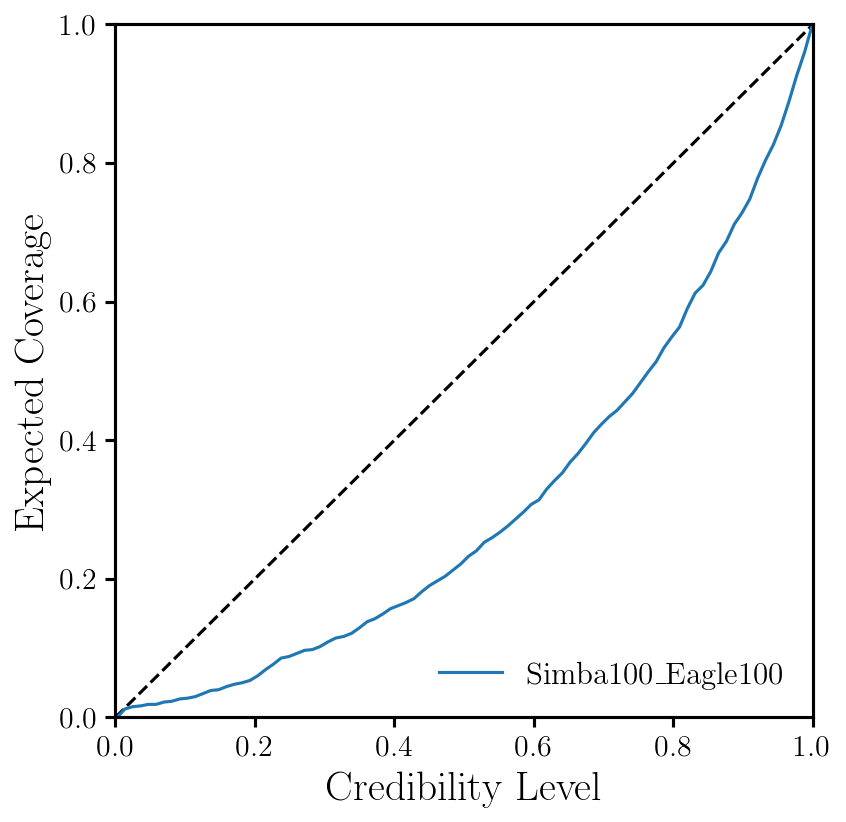

In [4]:
fig = plotting.plot_rank_statistics([ranks], labels=[f'{train_sim}_{test_sim}'])

fig, ax = plotting.plot_coverage([alpha], [ecp], labels=[f'{train_sim}_{test_sim}'])

In [8]:
import concurrent.futures

# Process the simulations in parallel to save time
# won't make a figure on same train and test simulation
def process_simulations_figures(train_sim):
    print(f'Processing {train_sim}')
    all_ranks = []
    all_alpha = []
    all_ecp = []
    for test_sim in sims:
        if train_sim == test_sim:
            continue
        
        ranks, alpha, ecp = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim=test_sim, version=1)
        
        all_ranks.append(ranks)
        all_alpha.append(alpha)
        all_ecp.append(ecp)

    fig = plotting.plot_rank_statistics(all_ranks, labels=[f'{train_sim}_{test_sim}' for test_sim in sims if train_sim != test_sim])
    fig.savefig(f'rank_statistics.{train_sim}.png', bbox_inches='tight')
    fig.clf()

    fig, ax = plotting.plot_coverage(all_alpha, all_ecp, labels=[f'{train_sim}_{test_sim}' for test_sim in sims if train_sim != test_sim])
    fig.savefig(f'coverage.{train_sim}.png', bbox_inches='tight')

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    executor.map(process_simulations_figures, sims)

Processing Simba100
Processing Eagle100
Processing TNG50
Processing TNG100
1005 models trained
606 models trained
903 models trained
998 models trained
[594, 316, 732, 978, 915]


/groups/chhahn/haloflow/src/haloflow/util.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  qphi = torch.load(fqphi, map_location=device)


[327, 293, 354, 244, 568]
[538, 312, 163, 496, 818]
[687, 714, 589, 844, 199]


KeyboardInterrupt: 

1005 models trainedProcessing TNG_ALL
467 models trained
[135, 145, 122, 91, 343]
